# App store data

Suppose that we are going to develop a new app, we are going to ignore staffing issues for the time being but address them at various points in the project. The standing assumption will be that whatever the app will be supported by in app ads. We are going to do some research into popular apps on both the Google Play and Apple Store as these are the two largest markets for smartphone users.

The data that is being used can be found at [Apple](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) and [Android](https://www.kaggle.com/lava18/google-play-store-apps)

It is worth noting that this project will probably be under construction for the foreseeable future as I learn and dabble with new techniques.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nbconvert

df_an = pd.read_csv('googleplaystore.csv', index_col =False)
df_ios = pd.read_csv('AppleStore.csv')


In [2]:
print(df_an.dtypes)
print('\n')
print(df_ios.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object


In [3]:
df_an.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df_ios.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


# Cleaning the data

We will proceed to do some basic cleaning for our data sets. First we take a reality check to make sure that our apps have the proper rating.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5E43E5F98>]],
      dtype=object)

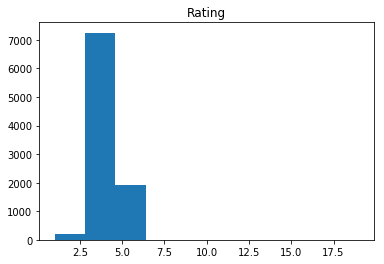

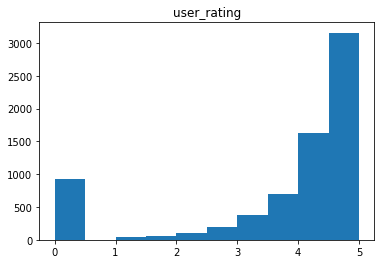

In [5]:
df_an.hist(column = 'Rating', grid = False)
df_ios.hist(column = 'user_rating', grid = False)

Seeing as how the Android app histogram has a bin to the right of '5.0' and scales to at least 17.5, something must have gone wrong in the web scrape. We will find any such app in a second, but first we also want to check to see if any rating are not reported.

In [6]:
df_an[df_an['Rating'].isnull() == True][['App','Installs','Reviews']].sort_values(by = ['Installs','Reviews'], ascending = False)

,App,Installs,Reviews
1559,Young Speeches,"500,000+",2221
5271,Aj Di Awaaz,500+,9
7277,Imperium CF,500+,9
7401,Mesure CI,500+,9
8322,DF 司機,500+,9
8339,DF Wall Plus – Droid Firewall,500+,9
10402,FH Calculator,500+,9
10411,FH Kufstein App,500+,9
10676,Calculator Fn,500+,9
6163,YourTube Video Views BG,500+,8


While we could have appled .dropna() to the data to remove these apps, we could have jumped the gun and deleted an app with a high number of downloads. As we can see, the app 'Young Speeches' claims to have at least half a million downloads and over two thousand reviews, but appears to have no rating in our data set. After a manual search the app does not readily appear on the Google Play store, so it can probably be ignored.

In [7]:
df_ios[df_ios['user_rating'].isnull() == True][['track_name','rating_count_tot']].sort_values(by = ['rating_count_tot'], ascending = False)

,track_name,rating_count_tot


No apps on the Apple Store with rating NA! So now we turn our attention to finding the apps that skewed the Android histogram to the right.

In [8]:
df_an[df_an['Rating'] > 5][['App','Installs','Reviews']]

,App,Installs,Reviews
10472,Life Made WI-Fi Touchscreen Photo Frame,Free,3.0M


Since everything was fine with the Apple data, we now take only the Android apps that we are interested in.

In [9]:
df_an1 = df_an[(df_an['Rating'].isnull() == False) &  (df_an['Rating'] <= 5)]

And as a quick reality check, we plot the new Android data histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5E4809F28>]],
      dtype=object)

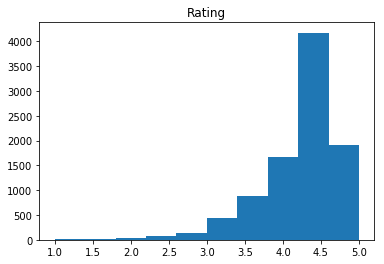

In [10]:
df_an1.hist(column = 'Rating', grid = False)

Since this is supposed to be a near finished product, assume that I have magical foresight for the next bit of code to address that the Android data has multiple rows of the same information. We can see this below for when looking at the categories, 'GAME' and 'FAMILY'.

In [11]:
game_bool = df_an1['Category'] == 'GAME'
df_an12 = df_an1[game_bool]
df_an12.sort_values(by = ['Installs', 'Rating'], ascending = False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,"500,000,000+",Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
1908,My Talking Tom,GAME,4.5,14892469,Varies with device,"500,000,000+",Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1705,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1751,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1842,Candy Crush Saga,GAME,4.4,22429716,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1869,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1966,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1661,Temple Run 2,GAME,4.3,8118609,62M,"500,000,000+",Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1662,Pou,GAME,4.3,10485308,24M,"500,000,000+",Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up


In [12]:
fam_bool = df_an1['Category'] == 'FAMILY'
df_an13 = df_an1[fam_bool]
df_an13.sort_values(by = ['Installs', 'Rating'], ascending = False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3888,My Talking Tom,FAMILY,4.5,14885236,Varies with device,"500,000,000+",Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
3994,Candy Crush Saga,FAMILY,4.4,22419455,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
3879,Pou,FAMILY,4.3,10483141,24M,"500,000,000+",Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
3933,Hungry Hearts Diner: A Tale of Star-Crossed Souls,FAMILY,4.9,46253,56M,"500,000+",Free,0,Everyone 10+,Simulation,"February 7, 2018",1.0.1,4.0 and up
3886,Find a Way: Addictive Puzzle,FAMILY,4.8,39480,14M,"500,000+",Free,0,Everyone,Puzzle,"June 16, 2017",4.1.1,4.1 and up
7010,Pixyfy: coloring by number coloring book,FAMILY,4.8,22290,13M,"500,000+",Free,0,Everyone,Puzzle,"August 5, 2018",18.08.05,4.0 and up
8995,German Listening,FAMILY,4.8,18298,8.0M,"500,000+",Free,0,Everyone,Education,"July 23, 2018",2.94,2.3.3 and up
2107,Ninja Dash - Ronin Jump RPG,FAMILY,4.7,8508,54M,"500,000+",Free,0,Everyone 10+,Arcade;Action & Adventure,"August 2, 2018",1.1.23,4.0.3 and up
2141,Monica Toy TV,FAMILY,4.7,6188,49M,"500,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"April 3, 2018",1.6.4,4.1 and up
2151,Toca Life: City,FAMILY,4.7,31100,24M,"500,000+",Paid,$3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up


As we can see from the above, there are multiple instances of Candy Crush Saga appearing in the category 'GAME', and it is worth noting that there is also a copy of Candy Crush Saga, with the same information, appearing in the category 'FAMILY' with a different index. So we are going to collapse all these rows down.

In [13]:
df_an1.drop_duplicates(subset=['App'], keep = 'first', inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Once again a reality check to make sure that we did what we said we were going to do. It is also worth noting, that since we specified "keep = 'first'" the Candy Crush with index 3994 that appeared in 'FAMILY' is now gone because the first index of Candy Crush appeared in 'GAME'.

In [14]:
df_an12 = df_an1[game_bool]
df_an12.sort_values(by = ['Installs', 'Rating'], ascending = False).head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,"500,000,000+",Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1661,Temple Run 2,GAME,4.3,8118609,62M,"500,000,000+",Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1662,Pou,GAME,4.3,10485308,24M,"500,000,000+",Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
4975,Solitaire: Decked Out Ad Free,GAME,4.9,37302,35M,"500,000+",Free,0,Everyone,Card,"May 8, 2017",1.3.3,4.1 and up
1779,PLANK!,GAME,4.7,7196,38M,"500,000+",Free,0,Everyone,Arcade,"July 17, 2018",1.0.2,4.3 and up
5818,Zlax.io Zombs Luv Ax,GAME,4.6,6344,32M,"500,000+",Free,0,Everyone,Action,"April 4, 2018",1.7,4.1 and up
9607,PokerStars Play: Free Texas Holdem Poker Game,GAME,4.6,14989,78M,"500,000+",Free,0,Teen,Card,"July 6, 2018",1.9.2,4.0.3 and up
3918,Law of Creation: A Playable Manga,GAME,4.5,13118,47M,"500,000+",Free,0,Teen,Adventure,"June 25, 2018",1.0.19,4.0.3 and up
4777,Hero Fighter X,GAME,4.5,24210,45M,"500,000+",Free,0,Teen,Action,"November 13, 2015",1.091,2.2 and up


In [15]:
df_an13 = df_an1[fam_bool]
df_an13.sort_values(by = ['Installs', 'Rating'], ascending = False).head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3933,Hungry Hearts Diner: A Tale of Star-Crossed Souls,FAMILY,4.9,46253,56M,"500,000+",Free,0,Everyone 10+,Simulation,"February 7, 2018",1.0.1,4.0 and up
3886,Find a Way: Addictive Puzzle,FAMILY,4.8,39480,14M,"500,000+",Free,0,Everyone,Puzzle,"June 16, 2017",4.1.1,4.1 and up
7010,Pixyfy: coloring by number coloring book,FAMILY,4.8,22290,13M,"500,000+",Free,0,Everyone,Puzzle,"August 5, 2018",18.08.05,4.0 and up
8995,German Listening,FAMILY,4.8,18298,8.0M,"500,000+",Free,0,Everyone,Education,"July 23, 2018",2.94,2.3.3 and up
2107,Ninja Dash - Ronin Jump RPG,FAMILY,4.7,8508,54M,"500,000+",Free,0,Everyone 10+,Arcade;Action & Adventure,"August 2, 2018",1.1.23,4.0.3 and up
2141,Monica Toy TV,FAMILY,4.7,6188,49M,"500,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"April 3, 2018",1.6.4,4.1 and up
4404,Fantastic Chefs: Match 'n Cook,FAMILY,4.7,8600,91M,"500,000+",Free,0,Everyone,Puzzle,"July 27, 2018",1.0.7,4.0.3 and up
9814,Advanced calculator fx 991 es plus & 991 ms plus,FAMILY,4.7,7252,9.2M,"500,000+",Free,0,Everyone,Education,"August 2, 2018",3.3.1-build-02-08-2018-19-release,4.0 and up
2044,Garden Fruit Legend,FAMILY,4.6,4289,33M,"500,000+",Free,0,Everyone,Casual;Brain Games,"July 31, 2018",3.5.3183,4.0.3 and up
2074,Fruit Cube Blast,FAMILY,4.6,9199,80M,"500,000+",Free,0,Everyone,Puzzle;Brain Games,"August 3, 2018",1.2.7,4.1 and up


Once again because of magical foresight, we will preemptively define the following function. The purpose of this function is to filter out any app that has more than 2 non-ascii characters in its name -- the 2 is subjective and could be whatever tolerance that we find acceptable.

In [16]:
# This function filters out apps with more than 3 nonascii characters in their name
def in_english(string):
    non_ascii = 0
    
    for char in string:
        if ord(char) > 127:
            non_ascii += 1
    if non_ascii >= 3:
        return False
    else:    
        return True

In [17]:
english_bool_an = df_an1['App'].apply(in_english) == False
english_bool_ios = df_ios['track_name'].apply(in_english) == False

In [18]:
df_an_tmp = df_an1[english_bool_an]
df_an_tmp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
309,Truyện Vui Tý Quậy,COMICS,4.5,144,4.7M,"10,000+",Free,0,Everyone,Comics,"July 19, 2018",3.0,4.0.3 and up
710,Flame - درب عقلك يوميا,EDUCATION,4.6,56065,37M,"1,000,000+",Free,0,Everyone,Education,"July 26, 2018",3.3,4.1 and up
1481,At home - rental · real estate · room finding ...,HOUSE_AND_HOME,3.8,2496,Varies with device,"500,000+",Free,0,Everyone,House & Home,"July 5, 2018",Varies with device,Varies with device
1488,"乐屋网: Buying a house, selling a house, renting ...",HOUSE_AND_HOME,3.7,2248,15M,"100,000+",Free,0,Everyone,House & Home,"August 3, 2018",v3.1.1,4.0 and up
1592,သိင်္ Astrology - Min Thein Kha BayDin,LIFESTYLE,4.7,2225,15M,"100,000+",Free,0,Everyone,Lifestyle,"July 26, 2018",4.2.1,4.0.3 and up
3750,РИА Новости,NEWS_AND_MAGAZINES,4.5,44274,8.0M,"1,000,000+",Free,0,Everyone,News & Magazines,"August 6, 2018",4.0.6,4.4 and up
3824,乗換NAVITIME Timetable & Route Search in Japan T...,MAPS_AND_NAVIGATION,4.4,50459,Varies with device,"5,000,000+",Free,0,Everyone,Maps & Navigation,"July 26, 2018",Varies with device,Varies with device
3960,► MultiCraft ― Free Miner! 👍,GAME,4.3,1305050,Varies with device,"50,000,000+",Free,0,Everyone 10+,Adventure,"July 29, 2018",1.1.11.11,4.1 and up
4193,صور حرف H,ART_AND_DESIGN,4.4,13,4.5M,"1,000+",Free,0,Everyone,Art & Design,"March 27, 2018",2.0,4.0.3 and up
4324,"L.POINT - 엘포인트 [ 포인트, 멤버십, 적립, 사용, 모바일 카드, 쿠폰,...",LIFESTYLE,4.0,45224,49M,"5,000,000+",Free,0,Everyone,Lifestyle,"August 1, 2018",6.5.1,4.1 and up


In [19]:
df_an1e = df_an1[english_bool_an == False]
df_an1e.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


Magical foresight!

In [20]:
df_iose = df_ios[english_bool_ios == False]
df_iose.head(10)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,7,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


Now that we have a list of valid apps, in latin characters. We return to our problem, we wanted to make a free app. So let's find the free apps.

In [21]:
# Technically we should check that we get the same answer when we use 'Type' == 'Free' and 'Price' == 0.
# In a previous scratch work this was checked.
# It is also worth noting that since Type or Price gives the same answer we could drop the 'Price' column to compact the data.
df_an1ef = df_an1e[df_an1e['Type'] == 'Free']
df_an1ef.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [22]:
# The USD column can be dropped as we are working with free apps.
df_iosef = df_iose[df_iose['price'] == 0.00]
df_iosef.head(10)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,2,281796108,Evernote - stay organized,158578688,USD,0.0,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.0,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.0,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
6,7,283646709,PayPal - Send and request money safely,227795968,USD,0.0,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
12,13,284815942,Google – Search made just for mobile,179979264,USD,0.0,479440,203,3.5,4.0,27.0,17+,Utilities,37,4,33,1
13,14,284847138,Bank of America - Mobile Banking,160925696,USD,0.0,119773,2336,3.5,4.5,7.3.8,4+,Finance,37,0,2,1
15,16,284876795,TripAdvisor Hotels Flights Restaurants,207907840,USD,0.0,56194,87,4.0,3.5,21.1,4+,Travel,37,1,26,1
16,17,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1


Now that we have isolated the free apps, it is now time to start looking at how they are distributed. If we start looking at the columns of the Android data to see what kind of app to make, we see that 'Category', 'Genres' and 'Content Rating' are probably the most helpful -- Content Rating probably won't be super helpful based on personal experience of looking at apps, but I wanted to see if I could do the following using a for loop, and looping over 2 things seems silly.

FAMILY                 1444
GAME                    830
TOOLS                   653
FINANCE                 289
PRODUCTIVITY            282
LIFESTYLE               278
BUSINESS                253
PHOTOGRAPHY             248
SPORTS                  237
COMMUNICATION           234
PERSONALIZATION         233
HEALTH_AND_FITNESS      233
MEDICAL                 227
SOCIAL                  201
NEWS_AND_MAGAZINES      198
TRAVEL_AND_LOCAL        179
SHOPPING                178
BOOKS_AND_REFERENCE     159
VIDEO_PLAYERS           144
DATING                  131
EDUCATION               113
MAPS_AND_NAVIGATION     111
ENTERTAINMENT           100
FOOD_AND_DRINK           92
AUTO_AND_VEHICLES        72
LIBRARIES_AND_DEMO       64
WEATHER                  64
HOUSE_AND_HOME           60
ART_AND_DESIGN           57
COMICS                   52
PARENTING                48
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64




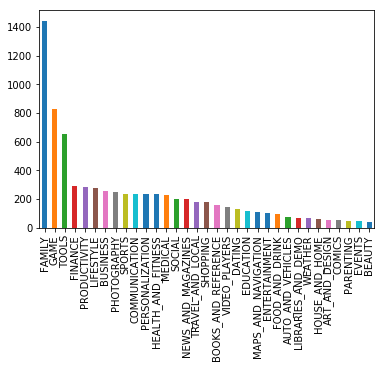

Tools                                    652
Entertainment                            455
Education                                408
Finance                                  289
Productivity                             282
Lifestyle                                277
Action                                   267
Business                                 253
Photography                              248
Sports                                   243
Communication                            234
Personalization                          233
Health & Fitness                         233
Medical                                  227
Social                                   201
News & Magazines                         198
Shopping                                 178
Travel & Local                           178
Simulation                               175
Books & Reference                        159
Arcade                                   153
Casual                                   150
Video Play

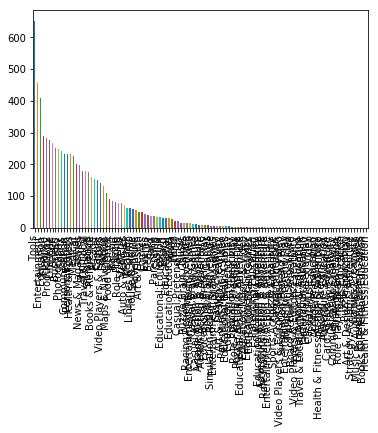

Everyone           6075
Teen                862
Mature 17+          339
Everyone 10+        271
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64




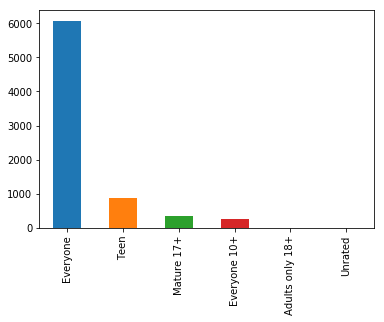

In [23]:
an_list = ['Category', 'Genres', 'Content Rating']

for item in an_list:
    print(df_an1ef[item].value_counts())
    print('\n')
    df_an1ef[item].value_counts().plot.bar()
    plt.show()


As we can see, Category seems to be dominated by the tags 'Family', 'Game' and 'Tools'. Genres is a complete mess and will need to be dealt with, and as stated above Content Rating wasn't super helpful. To deal with the problem of the Genres column, we note that it is largely due to things being double tagged. To deal with the double tag, we will simply just take the first tag. So something tagged "Adventure;Education" will be counted as "Adventure". Checking the list above does show that the tags are not in alphabetical order (Puzzle;Education exists) so this seems like a reasonable split.

In [24]:
df_an1ef["Genres_split"] = df_an1ef["Genres"]
df_an1ef["Genres_split"] = df_an1ef["Genres_split"].str.split(";", n = 1, expand = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Tools                      653
Entertainment              486
Education                  456
Finance                    289
Productivity               282
Lifestyle                  279
Action                     276
Business                   253
Photography                248
Sports                     245
Communication              235
Health & Fitness           235
Personalization            233
Medical                    227
Casual                     204
Social                     201
News & Magazines           198
Simulation                 185
Travel & Local             179
Shopping                   178
Arcade                     164
Books & Reference          160
Video Players & Editors    146
Dating                     131
Maps & Navigation          111
Puzzle                     104
Racing                     100
Food & Drink                92
Role Playing                88
Educational                 83
Strategy                    80
Auto & Vehicles             72
Weather 

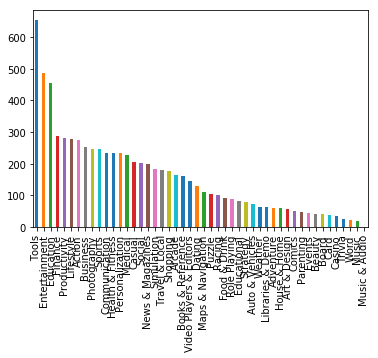

In [25]:
print(df_an1ef['Genres_split'].value_counts())
print('\n')
df_an1ef['Genres_split'].value_counts().plot.bar()
plt.show()

Cluttered but much more viewable. We can see that 'Tools', 'Entertainment' and 'Education' are the clear leaders with this lens.

We saw that the Category 'Family' has 1444 counted and in second is 'Game' with 830. So what is going on with this? We already partially addressed this, with apps like Candy Crush appearing as multiple rows, but maybe we can gleen something else if we look at the genres that live in the 'Family' Category.

Entertainment              386
Education                  343
Casual                     177
Simulation                 175
Educational                 83
Puzzle                      82
Role Playing                74
Strategy                    64
Racing                      16
Arcade                      11
Board                       10
Action                       6
Adventure                    3
Video Players & Editors      2
Sports                       2
Health & Fitness             2
Music                        2
Music & Audio                1
Art & Design                 1
Card                         1
Communication                1
Lifestyle                    1
Books & Reference            1
Name: Genres_split, dtype: int64




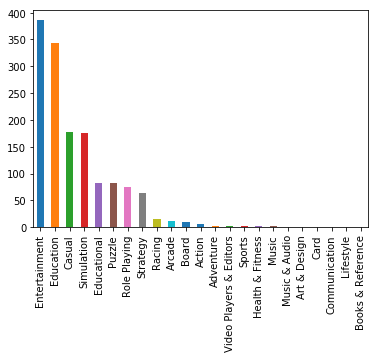

In [26]:
an_fam = df_an1ef[df_an1ef['Category'] == 'FAMILY']

print(an_fam['Genres_split'].value_counts())
print('\n')
an_fam['Genres_split'].value_counts().plot.bar()
plt.show()

As kind of expected, it appears to be that the apps in the 'Family' Category are split between Games and Education, possibly educational games. But this double indexing seems to be common and should be taken into account when making an app. Adding the tag 'Family' might be necessary to make sure that your app is seen.

All of the talk so far has been about the Android store. Let's turn our attention to the Apple store. The only real descriptive column we have is 'prime_genre', so let's go with that -- no for loop this time.

Games                1866
Entertainment         251
Photo & Video         160
Education             118
Social Networking     106
Shopping               83
Utilities              79
Sports                 69
Music                  66
Health & Fitness       65
Productivity           56
Lifestyle              50
News                   43
Travel                 40
Finance                35
Weather                28
Food & Drink           26
Reference              17
Business               17
Book                   12
Medical                 6
Navigation              6
Catalogs                4
Name: prime_genre, dtype: int64




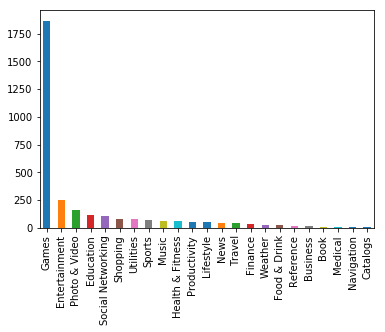

In [27]:
print(df_iosef['prime_genre'].value_counts())
print('\n')
df_iosef['prime_genre'].value_counts().plot.bar()
plt.show()

As we can see almost all free apps on the Apple store are games. So if we want to make one app and send it to both stores, we should probably make a game of some kind. However, there are the funding considerations. A lot of games tend to be free but opt for the so called 'Freemium' model -- more commonly known as 'pay to not wait'. 

Let's suppose that we have no real interest in making a game. As Educational apps tend to be popular on the Android store, we could make one of those, but we could run into the problem of lack of specialized knowledge. For example, second language apps, like Duolingo, tend to be quite popular but if we don't have people who can speak another language we are out of luck.

Finally we since 'Tools' is fairly popular on the Android store, maybe we could do something there (see below). But looking at the apps, it looks like a vast majority of the apps are related to either the telecom companies or the company the made the phone. Also apps like "Google Translate" fall into the category. While I tend to be optimistic and ambitious it might be hard to beat out Google. However, calculators also fall into this category. While it seem like not much can be done with calculators at this point, we could attempt to overthrow Texas Instruments and aim to make a graphing calculator app. We could have banner ads and make it so high school students no longer have to buy a graphing calculator for school. This also assume that the schools are trusting enough of their students to allow them to use their phones in class...

In [28]:
df_an1ef[df_an1ef['Category'] == 'TOOLS'].head(25)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Genres_split
3233,Moto File Manager,TOOLS,4.1,38655,5.9M,"10,000,000+",Free,0,Everyone,Tools,"February 1, 2018",v3.7.93,5.0 and up,Tools
3234,Google,TOOLS,4.4,8033493,Varies with device,"1,000,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device,Tools
3235,Google Translate,TOOLS,4.4,5745093,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 4, 2018",Varies with device,Varies with device,Tools
3236,Moto Display,TOOLS,4.2,18239,Varies with device,"10,000,000+",Free,0,Everyone,Tools,"August 6, 2018",Varies with device,Varies with device,Tools
3237,Motorola Alert,TOOLS,4.2,24199,3.9M,"50,000,000+",Free,0,Everyone,Tools,"November 21, 2014",1.02.53,4.4 and up,Tools
3238,Motorola Assist,TOOLS,4.1,37333,Varies with device,"50,000,000+",Free,0,Everyone,Tools,"January 17, 2016",Varies with device,Varies with device,Tools
3239,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759663,15M,"100,000,000+",Free,0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up,Tools
3240,Moto Suggestions ™,TOOLS,4.6,308,4.3M,"1,000,000+",Free,0,Everyone,Tools,"June 8, 2018",0.2.32,8.0 and up,Tools
3241,Moto Voice,TOOLS,4.1,33216,Varies with device,"10,000,000+",Free,0,Everyone,Tools,"June 5, 2018",Varies with device,Varies with device,Tools
3243,Device Help,TOOLS,4.2,28860,Varies with device,"100,000,000+",Free,0,Everyone,Tools,"July 18, 2018",Varies with device,Varies with device,Tools


We could also do some more work involving the rating. It might be the case the the majority of the Game apps are just terrible. But without some extra information, like retention or if the game has timers it would be a dice roll. The example I have in mind is someone who plays a game hits a timer, then switches to another game hits another timer, etc. 

We could also search for apps by specific substrings, say apps in the 'Tools' category that screen out robocalls. Although it probably doesn't fit our funding model of having in app ads.